In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor # can remove
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

# Load & Merge data

In [3]:
easyshare = pd.read_stata('data/sharewX_rel8-0-0_easySHARE_stata/easySHARE_rel8-0-0.dta')

illness_before = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/illness_before_module_v01.dta")
illness_during = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/illness_during_module_v01.dta")
job = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/job_module_v01.dta")
life = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/life_module_v01.dta")
young_age = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/young_age_module_v01.dta")
yearly = pd.read_stata("data/SHARE-ENV - Exposure to Environmental Hazards/yearly_module_v01.dta")
# individual_year = pd.read_stata(\"data/SHARE-ENV - Exposure to Environmental Hazards/individual_year_panel_v01.dta\")  NB times out, I ran it for 2+hrs,

df = pd.merge(easyshare, life, on=['mergeid', 'wave'], how='left')
#merged.to_pickle(\"data/df_merged.pkl\"

# Initial EDA

## EDA: whole dataset

In [4]:
df.describe()

,wave,wavepart,thinc_m,CDD_w,HDD_w,avg_conc_no2_mean,avg_conc_no2_median,avg_conc_pm10_mean,avg_conc_pm10_median,avg_conc_pm10_w,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
count,412110.000000,4.121100e+05,4.121100e+05,247129.000000,247129.000000,292308.000000,292308.000000,292308.000000,292308.000000,292330.000000,...,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,247112.000000,2.471290e+05,247129.000000,247129.000000
mean,5.035566,9.878451e+05,8.085985e+05,94.902377,2596.399453,8.706448,8.741836,19.625999,19.680202,20.533115,...,20.089201,24.628500,27.599796,22.380423,8.054352,3.336129,1.804966,3.452446e+02,7.374281,344.103359
std,2.084000,3.082496e+06,8.591955e+07,128.238707,924.667334,4.113612,4.223463,7.740768,7.827614,8.009251,...,12.919192,12.961825,11.654469,22.909336,7.873321,4.334066,4.329890,2.278218e-13,6.692278,4.119086
min,1.000000,1.000000e+00,-9.972739e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.452446e+02,-9.596973,328.414221
25%,4.000000,7.800000e+01,1.027684e+03,8.004644,2011.427361,5.823186,5.824138,14.328774,14.446408,15.433441,...,8.858876,16.532478,21.304916,4.366660,0.662412,0.023839,0.000000,3.452446e+02,1.995656,345.244644
50%,5.000000,4.567000e+03,1.582463e+04,34.827944,2783.924889,8.341747,8.352927,19.762360,19.834177,20.298185,...,22.411585,27.590120,28.420017,13.743146,5.847452,1.070523,0.031710,3.452446e+02,6.422247,345.244644
75%,7.000000,4.567800e+04,3.137558e+04,138.272718,3192.298788,11.386459,11.388282,24.509069,24.615608,25.254732,...,29.275328,32.789524,35.428135,36.778969,13.796133,6.220437,1.781571,3.452446e+02,12.631802,345.244644
max,8.000000,1.234568e+07,9.592648e+09,607.820175,5830.370983,20.133627,20.981754,49.492981,51.762325,55.629631,...,67.147392,63.949547,65.836136,131.609512,44.050232,28.332399,47.900356,3.452446e+02,25.564817,345.244644


In [5]:
df.columns

Index(['mergeid', 'hhid', 'coupleid', 'wave', 'wavepart', 'int_version',
       'int_year', 'int_month', 'country', 'country_mod',
       ...
       'tx_2p5_5_w', 'tx_5_7p5_w', 'tx_7p5_10_w', 'tx_g30_w', 'tx_neg2p5_0_w',
       'tx_neg5_neg2p5_w', 'tx_neg5_w', 'warm_o3_w', 'winter_w',
       'yearly_o3_w'],
      dtype='object', length=332)

In [6]:
df.head()

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
0,AT-000327-01,AT-000327-A,AT-000327-01-02,1,12,0. Baseline questionnaire,2004,6. June,11. Austria,40. Austria,...,35.274521,23.818699,18.540958,7.048795,18.125587,7.795378,1.370161,345.244644,4.683478,328.875931
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT-000327-02,AT-000327-A,AT-000327-01-02,1,12,0. Baseline questionnaire,2004,6. June,11. Austria,40. Austria,...,35.274521,23.818699,18.540958,7.048795,18.125587,7.795378,1.370161,345.244644,4.683478,328.875931
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,18.797579,32.932247,32.837791,16.854519,11.468878,6.732851,0.314328,345.244644,18.478947,345.244644
4,AT-000674-01,AT-000674-A,,4,456,0. Baseline questionnaire,2011,11. November,11. Austria,40. Austria,...,28.303789,27.970161,24.312283,12.823309,15.045419,7.444062,0.418507,345.244644,-0.185899,345.244644


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412110 entries, 0 to 412109
Columns: 332 entries, mergeid to yearly_o3_w
dtypes: category(102), float32(202), float64(21), int32(1), int8(1), object(5)
memory usage: 444.0+ MB


## EDA: Label Variable

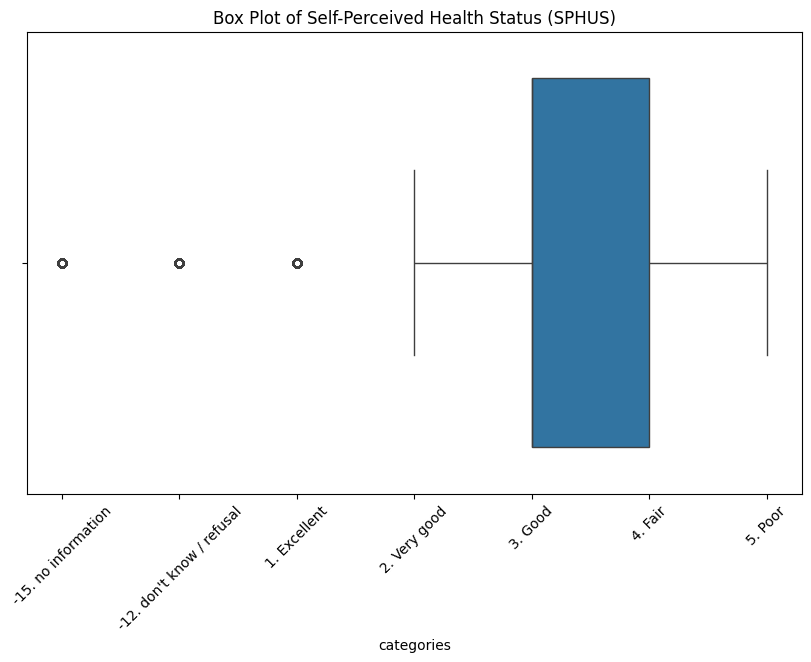

In [8]:
# box plot - doesn't make sense to do boxplot??
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sphus'])
plt.title('Box Plot of Self-Perceived Health Status (SPHUS)')
plt.xlabel('categories')
plt.xticks(rotation=45)
plt.show()

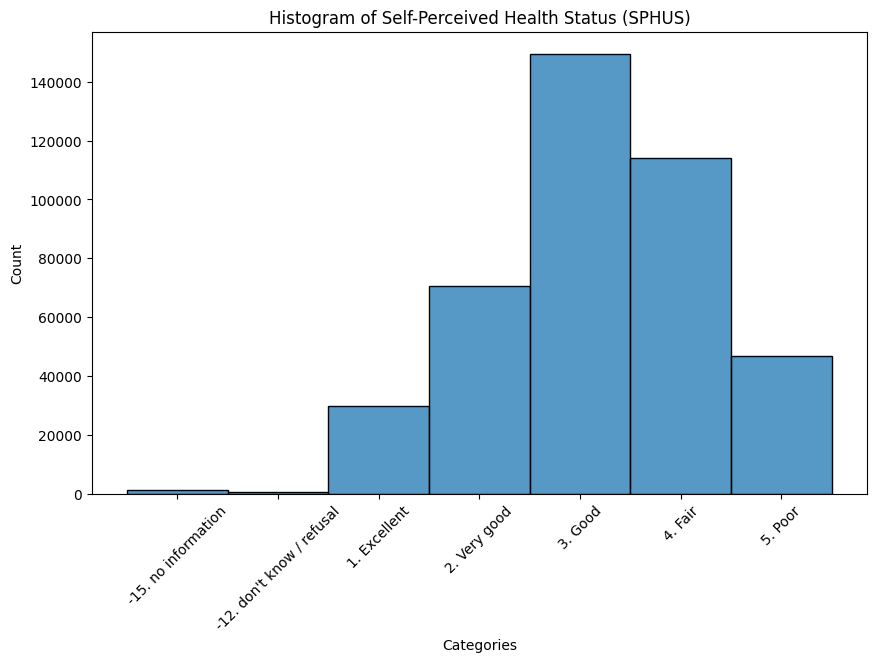

In [9]:
# histo
plt.figure(figsize=(10, 6))
sns.histplot(df['sphus'], discrete=True)
plt.title('Histogram of Self-Perceived Health Status (SPHUS)')
plt.xlabel('Categories')
plt.xticks(rotation=45)
plt.show()

# Selecting Relevant Subset of Data

Given that this is time series dataset, we are just going to select the most up to date data for each available observation.

In [10]:
observations_per_wave = df['wave'].value_counts()
print(observations_per_wave)

wave
7    77202
6    68085
5    66065
4    58000
8    46733
2    37143
1    30419
3    28463
Name: count, dtype: int64


In [11]:
df_sorted = df.sort_values(by=['mergeid', 'wave'], ascending=[True, False])
df_most_recent_wave_per_mergeid = df_sorted.drop_duplicates(subset='mergeid', keep='first')

In [12]:
df_most_recent_wave_per_mergeid

,mergeid,hhid,coupleid,wave,wavepart,int_version,int_year,int_month,country,country_mod,...,tx_2p5_5_w,tx_5_7p5_w,tx_7p5_10_w,tx_g30_w,tx_neg2p5_0_w,tx_neg5_neg2p5_w,tx_neg5_w,warm_o3_w,winter_w,yearly_o3_w
1,AT-000327-01,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT-000327-02,AT-000327-A,AT-000327-01-02,2,12,1. Longitudinal questionnaire,2007,3. March,11. Austria,40. Austria,...,18.797579,32.932247,32.837791,16.854519,11.468878,6.732851,0.314328,345.244644,18.478947,345.244644
6,AT-000674-01,AT-000674-A,,6,456,1. Longitudinal questionnaire,2015,6. June,11. Austria,40. Austria,...,34.005589,31.472639,35.184925,36.778969,4.499215,0.168908,0.001749,345.244644,-0.222259,345.244644
11,AT-001215-01,AT-001215-A,,8,45678,1. Longitudinal questionnaire,2020,1. January,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,AT-001492-01,AT-001492-A,AT-001492-01-02,8,45678,1. Longitudinal questionnaire,2020,2. February,11. Austria,40. Austria,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412103,SK-995042-01,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412105,SK-995042-02,SK-995042-A,SK-995042-01-02,8,78,0. Baseline questionnaire,2019,12. December,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412107,SK-996004-01,SK-996004-A,,8,78,0. Baseline questionnaire,2020,2. February,63. Slovakia,703. Slovakia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412108,SK-999958-01,SK-999958-A,SK-999958-01-02,7,7,0. Baseline questionnaire,2017,8. August,63. Slovakia,703. Slovakia,...,22.639585,23.258799,21.059399,36.957790,9.795322,9.315717,6.441623,345.244644,15.017466,345.244644


# check for NAs: Feature Selection (#1)

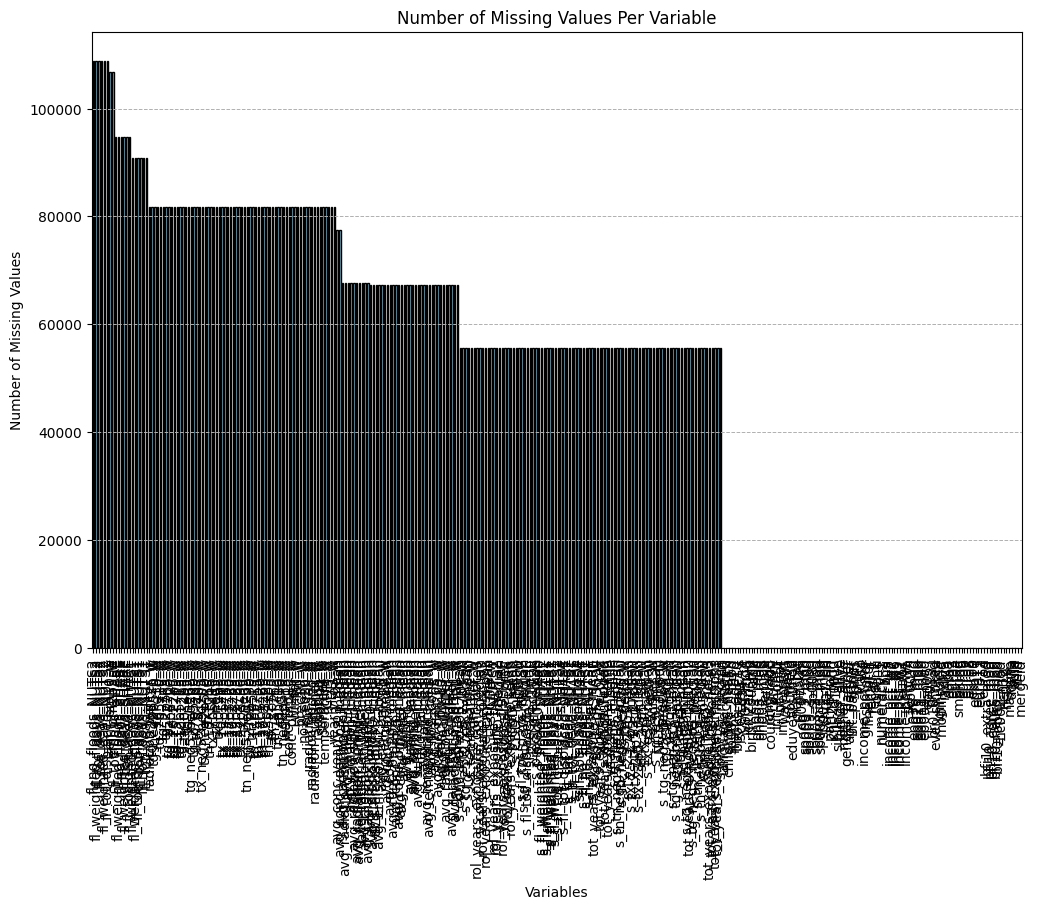

In [13]:
na_counts = df_most_recent_wave_per_mergeid.isna().sum()

na_counts_sorted = na_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
na_counts_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Missing Values Per Variable')
plt.xlabel('Variables')
plt.ylabel('Number of Missing Values')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.show()

This is *Round 1* of dropping irrelevant featurest that do not support prediction

In [14]:
#NEW
# dropping those variables lacking greate chunks of data
columns_to_drop = na_counts[na_counts < 2000].index
columns_to_drop = columns_to_drop.drop('sphus')

df_dropped = df.drop(columns=columns_to_drop)

shape_of_dataframe_full = df_most_recent_wave_per_mergeid.shape
shape_of_dataframe_dropped = df_dropped.shape

print(f"No. of samples: {shape_of_dataframe_full[0]}")
print(f"No. of columns (full): {shape_of_dataframe_full[1]}")
print(f"No. of columns (dropped): {shape_of_dataframe_dropped[1]}")

No. of samples: 140125
No. of columns (full): 332
No. of columns (dropped): 226


im not sure if we need to specify how we handle the rest of the NAs - if we just drop all  the observsations which have NAs, then we are going to loose ALOT of observations????

# *(Lino) Grouped FS*
*(Lino) My chatty friend helped me group the variables based on the codebook that are from the same higher level feature.* 

In [18]:
# Assuming 'df' is your DataFrame after loading the CSV
variable_names = df_dropped.columns.tolist()

# Initialize lists for each category
temperature_vars = []
radiation_vars = []
precipitation_vars = []
pollution_vars = {'PM2.5': [], 'PM10': [], 'NO2': [], 'O3': []}
flood_vars = []
heating_cooling_vars = []  # For Heating Degree Days (HDD) and Cooling Degree Days (CDD)

for var in variable_names:
    # Temperature variables
    if 'tn_' in var or 'tg_' in var or 'tx_' in var:
        temperature_vars.append(var)
    
    # Radiation variables
    elif 'radiation' in var:
        radiation_vars.append(var)
    
    # Precipitation variables
    elif 'prec' in var:
        precipitation_vars.append(var)
    
    # Pollution variables
    elif 'pm2p5' in var or 'conc_pm2p5' in var:
        pollution_vars['PM2.5'].append(var)
    elif 'pm10' in var or 'conc_pm10' in var:
        pollution_vars['PM10'].append(var)
    elif 'no2' in var or 'conc_no2' in var:
        pollution_vars['NO2'].append(var)
    elif 'o3' in var or 'conc_o3' in var:
        pollution_vars['O3'].append(var)
    
    # Flood variables
    elif 'fl_' in var:
        flood_vars.append(var)
    
    # Heating and Cooling Degree Days
    elif 'HDD' in var or 'CDD' in var:
        heating_cooling_vars.append(var)


# One Hot Encoding

In [22]:
# rename sphus values as just the give numbers 
df_dropped['sphus'] = df_dropped['sphus'].str.extract(r'(-?\d+)').astype(float)

In [23]:
categorical_columns = df_dropped.select_dtypes(include=['object', 'category']).columns

print(categorical_columns)
for col in categorical_columns:
    print(f"{col} has {df_dropped[col].nunique()} unique values.")

df_encoded = pd.get_dummies(df_dropped, columns=categorical_columns)
df_encoded.shape # nb now we have more columns (about 300 more given number of unique values, 
# and rows (why more rows? also why so many more columns)

Index(['year_life_module', 'NUTS1_floods', 'NUTS2_floods'], dtype='object')
year_life_module has 14 unique values.
NUTS1_floods has 96 unique values.
NUTS2_floods has 203 unique values.


(412110, 536)

????? come back to this - for the moment i'm going to just drop the categorical columns (except outcome var), but come back to work out what's going wrong above and include them.

In [39]:
# temporary: dropping categorical variables
df_categ_drop = df_dropped.drop(columns=categorical_columns)
df_categ_drop.shape


(412110, 223)

# *(Lino) Subsample the data*

In [86]:
df_sample = df_categ_drop.sample(frac=0.01, random_state = 42)

# Split data

In [87]:
# Define features and target
X = df_sample.drop('sphus', axis=1)  # Predictor variables
y = df_sample['sphus']  # Outcome variable

# Order Features by Number of NAs
X = X.loc[:, X.isnull().sum().sort_values().index] # need to do this BEFORE impute values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data

In [88]:
# Normalize the data
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()
pipeline = make_pipeline(imputer, scaler)
X_train_scaled = pipeline.fit_transform(X_train) # THIS AND LINE BELOW HAVE TO GET MOVED INTO FITTING LOOP AS CANOT RUN ILOC ON NUMPY ARRAY
X_test_scaled = pipeline.transform(X_test) 

# *(Lino)* 
*Saving the feature groups in a dic to iterate over them*

In [89]:
# Feature groups identified previously
feature_groups = {
    'temperature': temperature_vars,
    'radiation': radiation_vars,
    'precipitation': precipitation_vars,
    'pollution_PM2.5': pollution_vars['PM2.5'],
    'pollution_PM10': pollution_vars['PM10'],
    'pollution_NO2': pollution_vars['NO2'],
    'pollution_O3': pollution_vars['O3'],
    'floods': flood_vars,
    'heating_cooling': heating_cooling_vars
}

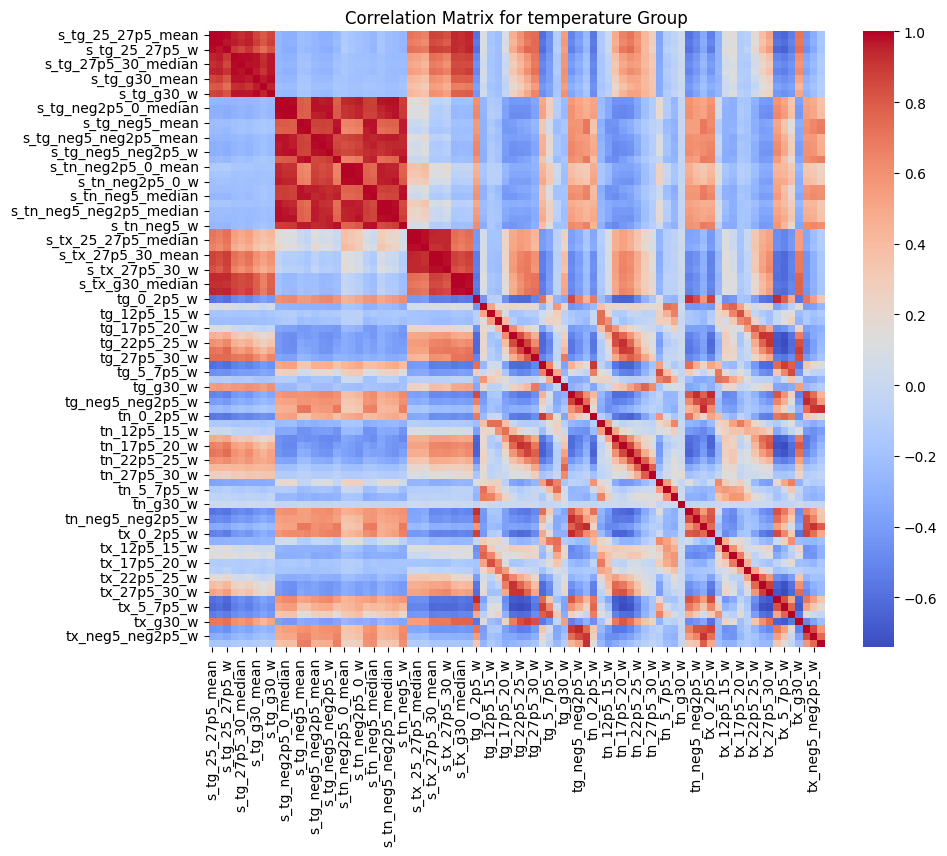

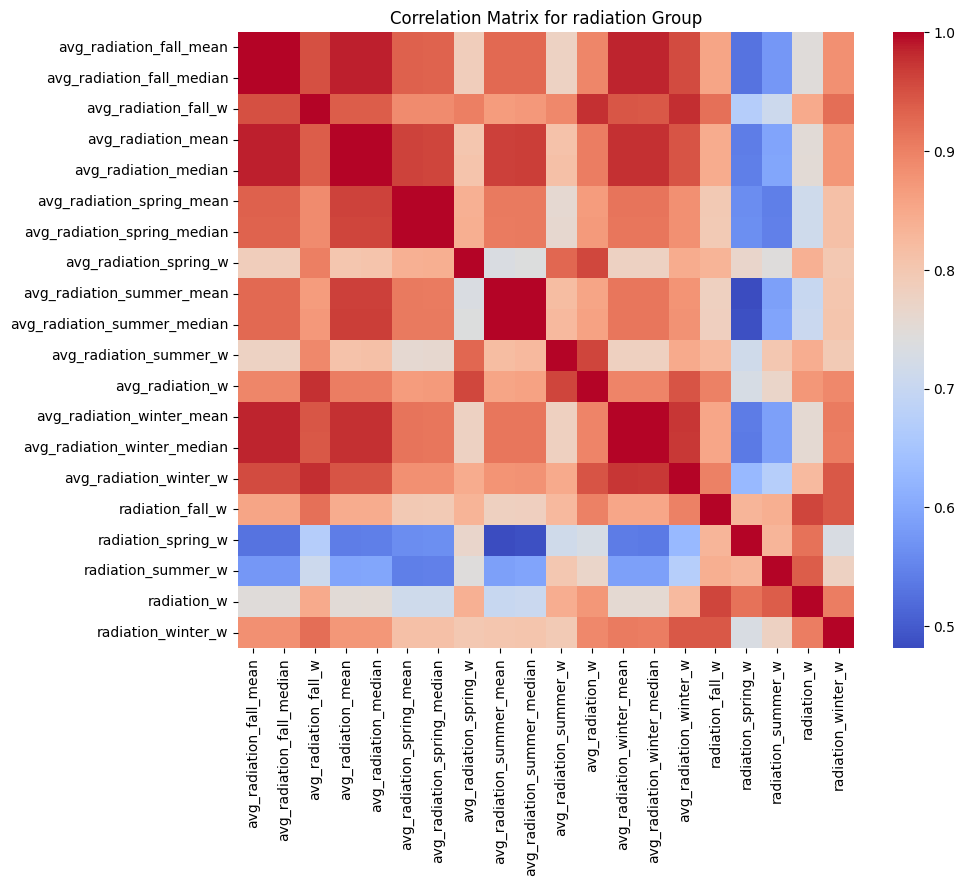

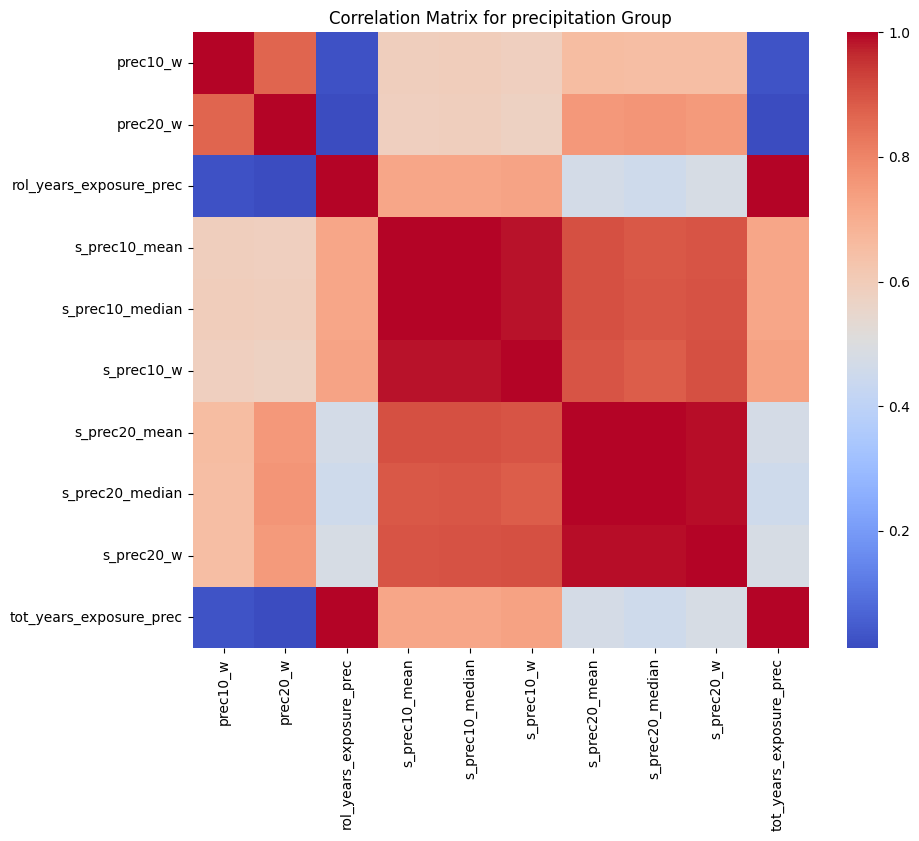

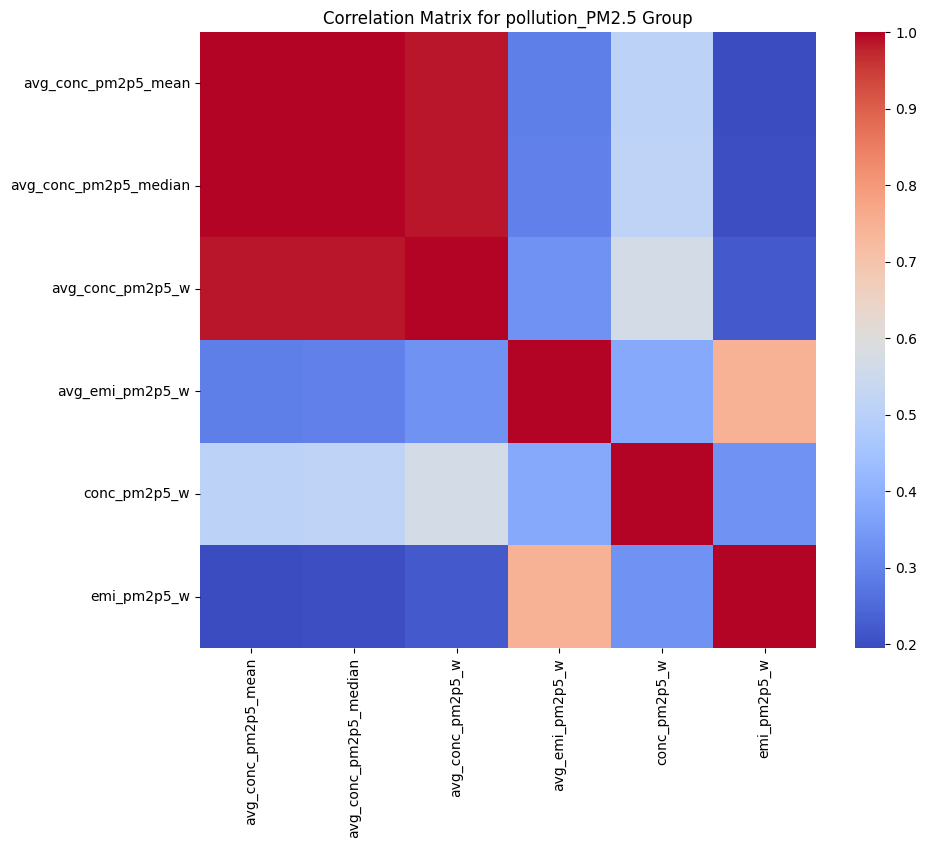

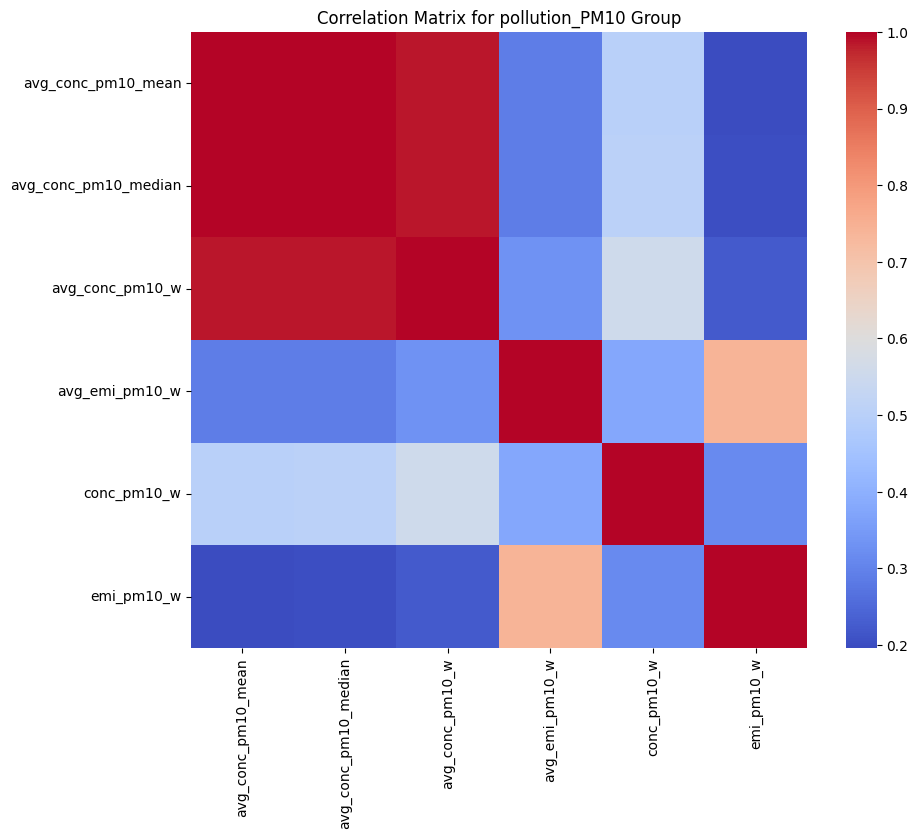

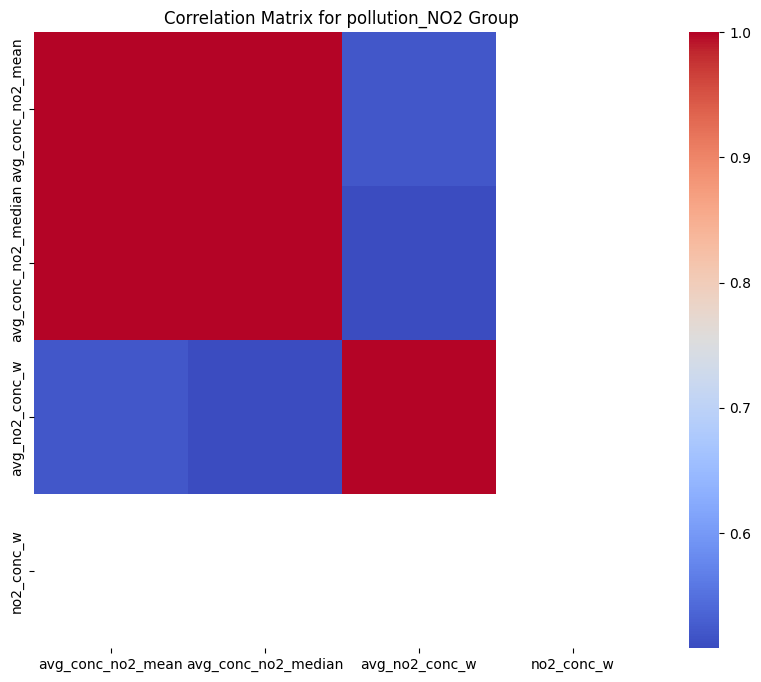

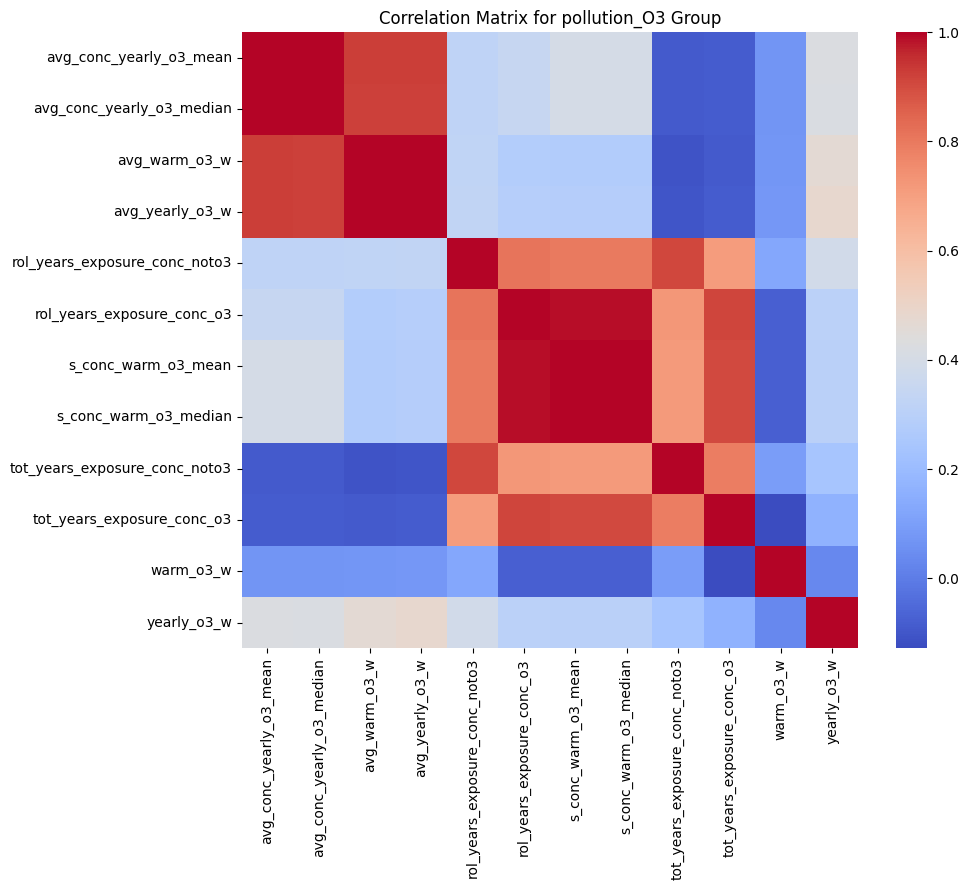

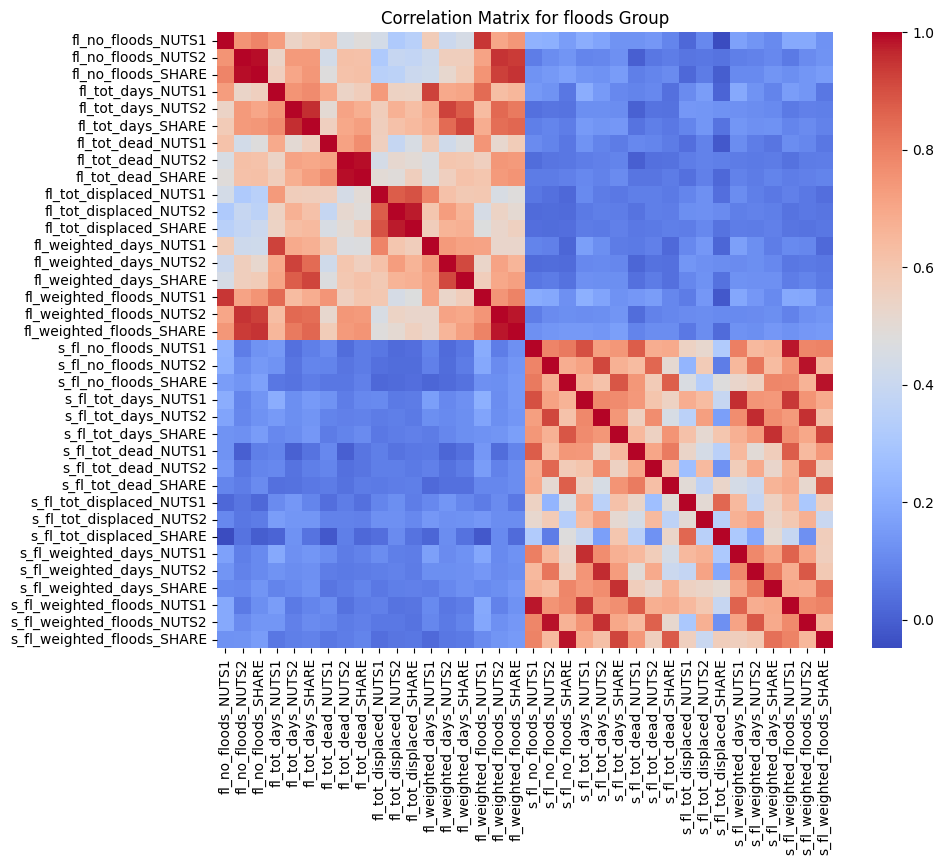

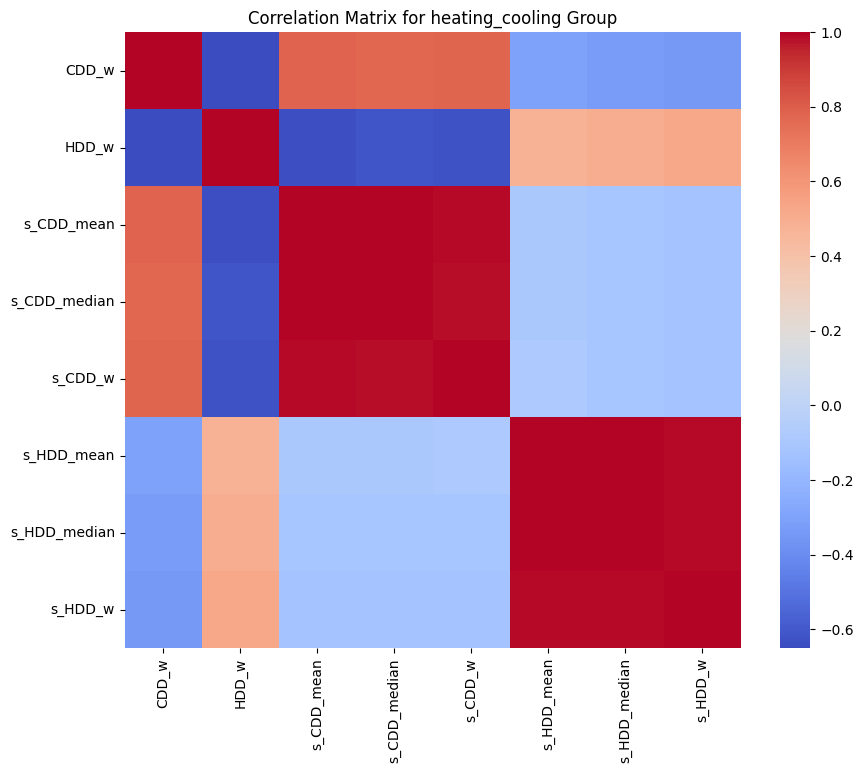

In [90]:
for group_name, features in feature_groups.items():
    # Filter the DataFrame to keep only the current group's features
    df_group = df_categ_drop[features]
    
    # Calculate the correlation matrix
    corr_matrix = df_group.corr()
    
    # Plot the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
    plt.title(f'Correlation Matrix for {group_name} Group')
    plt.show()


*I tried two ways of RF-based feature selection by group: firstly I fitted a RF just with the features of group and then compared the importance. Secondly I fitted a model with all features and then compared the importance of each feature per  each group. I get the same most important features per group with both methods*

In [91]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5)

best_features = {}

# Iterate over each feature group
for group_name, features in feature_groups.items():
    # Ensure the feature group is not empty
    if not features:
        continue
    
    # Select the current group's features from the training data
    X_train_group = X_train[features]
    X_test_group = X_test[features]

    # Fit the model
    rf_model.fit(X_train_group, y_train)

    # Get the feature importances and identify the most important feature
    importances = rf_model.feature_importances_
    most_important_feature = features[np.argmax(importances)]
    best_features[group_name] = most_important_feature

    # Optionally, evaluate and print the model's performance
    predictions = rf_model.predict(X_test_group)
    accuracy = accuracy_score(y_test, predictions)
    print(f"{group_name} - Most Important Feature: {most_important_feature}, Accuracy: {accuracy:.4f}")

# best_features now contains the most important feature from each group
print("Best Features by Group:", best_features)

temperature - Most Important Feature: s_tg_25_27p5_mean, Accuracy: 0.3576
radiation - Most Important Feature: avg_radiation_fall_mean, Accuracy: 0.3406
precipitation - Most Important Feature: prec10_w, Accuracy: 0.3636
pollution_PM2.5 - Most Important Feature: avg_conc_pm2p5_mean, Accuracy: 0.3370
pollution_PM10 - Most Important Feature: avg_conc_pm10_mean, Accuracy: 0.3358
pollution_NO2 - Most Important Feature: avg_conc_no2_median, Accuracy: 0.3442
pollution_O3 - Most Important Feature: avg_conc_yearly_o3_mean, Accuracy: 0.3600
floods - Most Important Feature: fl_no_floods_NUTS1, Accuracy: 0.3503
heating_cooling - Most Important Feature: CDD_w, Accuracy: 0.3612
Best Features by Group: {'temperature': 's_tg_25_27p5_mean', 'radiation': 'avg_radiation_fall_mean', 'precipitation': 'prec10_w', 'pollution_PM2.5': 'avg_conc_pm2p5_mean', 'pollution_PM10': 'avg_conc_pm10_mean', 'pollution_NO2': 'avg_conc_no2_median', 'pollution_O3': 'avg_conc_yearly_o3_mean', 'floods': 'fl_no_floods_NUTS1', '

In [92]:
# Train a Random Forest model on the entire dataset
rf_model_global = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)
rf_model_global.fit(X_train, y_train)

# Get global feature importances
importances_global = rf_model_global.feature_importances_

# For each group, identify the most important feature based on the global model
best_features_global = {}
for group_name, features in feature_groups.items():
    group_importances = {feature: importances_global[X_train.columns.get_loc(feature)] for feature in features}
    most_important_feature = max(group_importances, key=group_importances.get)
    best_features_global[group_name] = most_important_feature

print("Most Important Features by Group (Global Context):", best_features_global)

Most Important Features by Group (Global Context): {'temperature': 's_tg_25_27p5_mean', 'radiation': 'avg_radiation_fall_mean', 'precipitation': 'prec10_w', 'pollution_PM2.5': 'avg_conc_pm2p5_mean', 'pollution_PM10': 'avg_conc_pm10_mean', 'pollution_NO2': 'avg_conc_no2_mean', 'pollution_O3': 'avg_conc_yearly_o3_mean', 'floods': 'fl_no_floods_NUTS1', 'heating_cooling': 'CDD_w'}


In [93]:
# Compare the best features from the global and group-specific models

comparison = best_features_global.items() == best_features.items()
print(comparison)

False


*We might want to only include those variations of the variables that have the most importance. This can simplify our model and make it a bit less computationally expensive.*

In [94]:
# Given: feature_groups, best_features

# Convert best_features values to a set for faster lookup
best_features_set = set(best_features.values())

# Initialize a list to hold variables to drop
vars_to_drop = []

# Go through each group and add to vars_to_drop if not in best_features
for group, vars in feature_groups.items():
    vars_to_drop.extend([var for var in vars if var not in best_features_set])

# Now vars_to_drop contains all the variables to be dropped from each group
X_train_selected = X_train.drop(columns=vars_to_drop, errors='ignore')
X_test_selected = X_test.drop(columns=vars_to_drop, errors='ignore')
X_train_s_scaled = pipeline.fit_transform(X_train_selected) # THIS AND LINE BELOW HAVE TO GET MOVED INTO FITTING LOOP AS CANOT RUN ILOC ON NUMPY ARRAY
X_test_s_scaled = pipeline.transform(X_test_selected) 
print("Original X_train shape:", X_train.shape)
print("Modified X_train shape:", X_train_s_scaled.shape)
print("Original X_test shape:", X_test.shape)
print("Modified X_test shape:", X_test_s_scaled.shape)


Original X_train shape: (3296, 222)
Modified X_train shape: (3296, 45)
Original X_test shape: (825, 222)
Modified X_test shape: (825, 45)


In [95]:
rf_top_grouped = RandomForestClassifier(random_state=42)

rf_top_grouped.fit(X_train_s_scaled, y_train)

# Assuming `rf` is your fitted RandomForestClassifier instance
rf_grouped_parameters = rf_top_grouped.get_params()

for param, value in rf_grouped_parameters.items():
    print(f"The parameter '{param}' is set to {value}.")

The parameter 'bootstrap' is set to True.
The parameter 'ccp_alpha' is set to 0.0.
The parameter 'class_weight' is set to None.
The parameter 'criterion' is set to gini.
The parameter 'max_depth' is set to None.
The parameter 'max_features' is set to sqrt.
The parameter 'max_leaf_nodes' is set to None.
The parameter 'max_samples' is set to None.
The parameter 'min_impurity_decrease' is set to 0.0.
The parameter 'min_samples_leaf' is set to 1.
The parameter 'min_samples_split' is set to 2.
The parameter 'min_weight_fraction_leaf' is set to 0.0.
The parameter 'monotonic_cst' is set to None.
The parameter 'n_estimators' is set to 100.
The parameter 'n_jobs' is set to None.
The parameter 'oob_score' is set to False.
The parameter 'random_state' is set to 42.
The parameter 'verbose' is set to 0.
The parameter 'warm_start' is set to False.


In [96]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

cv_rf = GridSearchCV(estimator=rf_top_grouped, param_grid=param_grid, cv=5) #this is the model after GridSearchCV 
cv_rf.fit(X_train_s_scaled, y_train) # refits model using best parameters on the entire training set

# Best parameters
print("Best parameters:", cv_rf.best_params_)

/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# Initial Random Forest Model Fitting & Feature Selection (#2)

Dropping further features based on initial cross validation results

In [97]:
rf_limitted = RandomForestClassifier(random_state=42, n_estimators=10, max_depth=5) # later come back and try different parameters, but for now  use simple models to test for feature selection (otherwise it takes ages to run)


# Feature counts to evaluate
feature_counts = [50, 100, 150, 200, X_train.shape[1]]  # The last one is to use all features

results = {} # store the average accuracy for each feature count NEED TO OPERATIONALISE can i remove this?

for count in feature_counts:
    # Select the first N features
    X_train_subset = X_train.iloc[:, :count]
    X_test_subset = X_test.iloc[:, :count]

    # Apply imputation and scaling to these subsets
    X_train_scaled_subset = pipeline.fit_transform(X_train_subset) # is this probelmatic:???? is it meaning each subset has different scaling / normalization???
    X_test_scaled_subset = pipeline.transform(X_test_subset)
    
    # Evaluate the model
    scores = cross_val_score(rf_limitted, X_train_scaled_subset, y_train, cv=5, scoring='accuracy') 
    print(f"Average accuracy with top {count} features: {np.mean(scores):.4f}")



/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Average accuracy with top 50 features: 0.3416


/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Average accuracy with top 100 features: 0.3353


/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Average accuracy with top 150 features: 0.3377


/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Average accuracy with top 200 features: 0.3401


/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Average accuracy with top 222 features: 0.3362


Best accuracy achieved with 100 features... 

...But this doesn't tell us about which ones are important

In [98]:
rf = RandomForestClassifier(random_state=42) 
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

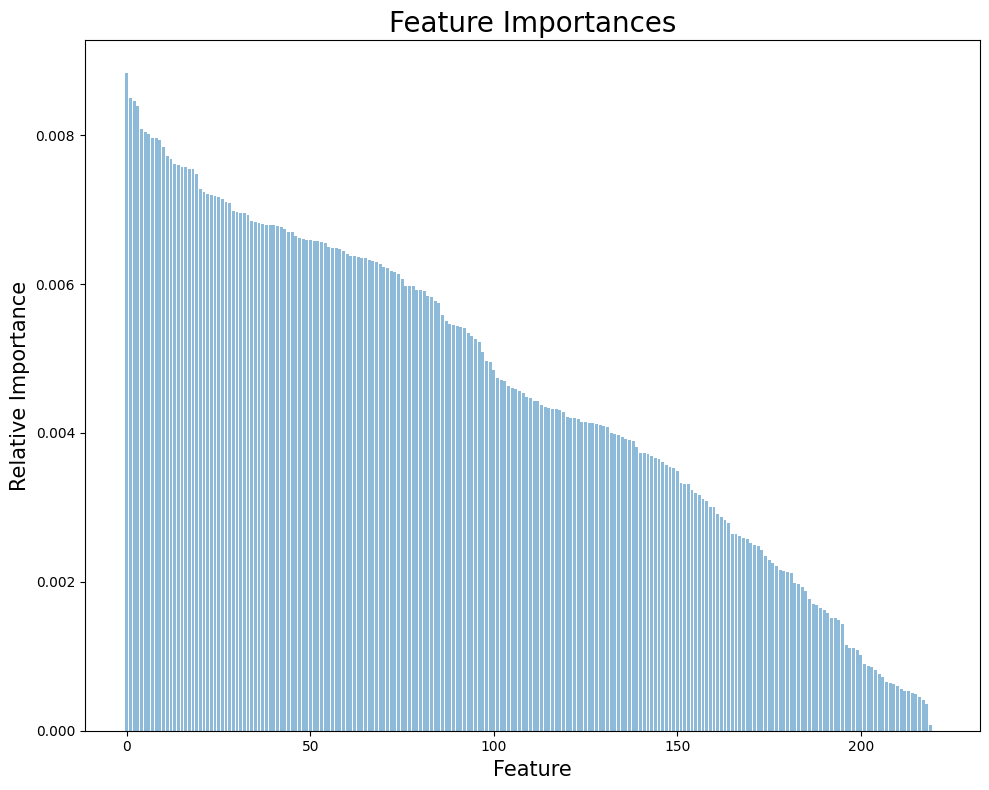

In [99]:
feature_importances = rf.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.title('Feature Importances', fontsize=20)
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices], align='center', alpha=0.5)
plt.ylabel('Relative Importance', fontsize=15)
plt.xlabel('Feature', fontsize=15)
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping
plt.show()


Can similarly see a drop ~100 var where importance drops quickly. This makes sense that it coincides with our model being most accurate when using 100 features? ~100 we are adding features which increases multicoliniearity etc but without adding predictive power / exploring new ends of feature space?

To do: run analysis 
- 1) showing covariance of all the features up until here, 
- 2) showing covariance between the trees / weak estimators for the different levels of trees tested (see Drew's demo in class)? 

## Covariance Matrix & Heatmap (to measure for Multicolliniearity of features)

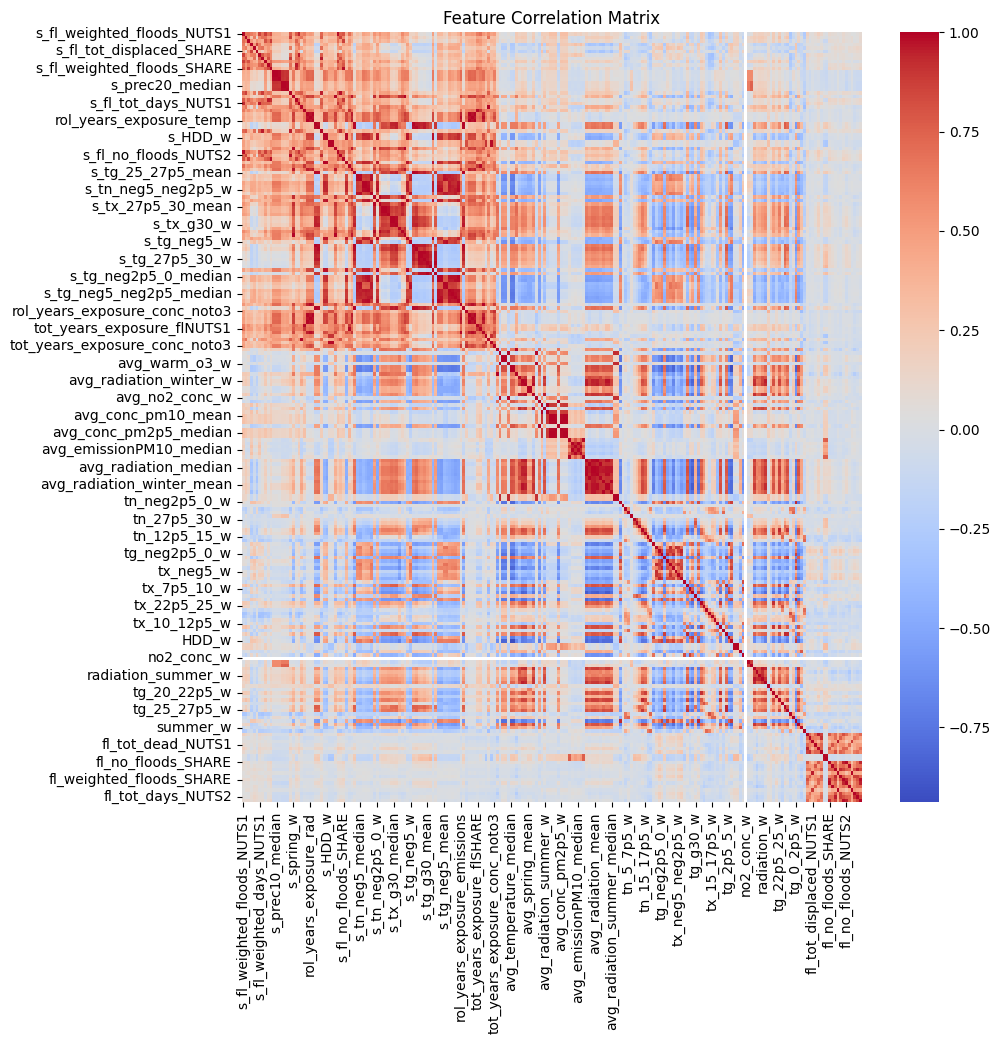

In [100]:
corr_matrix = X_train.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

Looks like in general it's not too bad, but that there are certain clusters of grounds of ~5-10 similar features which are measuring similar things? Also top left and far bottom right shows quite a bit of correleation.
Based off this, could remove those with a certain threshold of correlation? of is this already what the feature importance from RandomForest does?

# Refiting Model with 100 Features

Here we're taking the top 100 most important features from the RandomForest model fitting. Should we instead have looked for covariance between features (see above)

Also, we ought to 'interpret' which features we are keeping using domain knowledge (this was also Divya's suggestion). So we look at the list of kept/removed features and suggest why we as 'domain experts' choose to follow / reject (ie not just relying on naive statistics)

In [101]:
# pulling out the top 100 features
top_100_indices = sorted_indices[:100]
X_train_top_100 = X_train_scaled[:, top_100_indices]

# Convert indices to column names
top_100_feature_names = X_train.columns[top_100_indices]

# generating list of dropped feature names
all_feature_names = X_train.columns.tolist()
rejected_feature_names = [feature for feature in all_feature_names if feature not in top_100_feature_names]

print('These are the top 100 features:')
for feature in top_100_feature_names:
    print(feature)

print('These are the rejected features:')
for feature in rejected_feature_names:
    print(feature)

These are the top 100 features:
avg_summer_median
avg_winter_mean
s_summer_w
s_tx_25_27p5_mean
avg_winter_median
avg_radiation_summer_w
s_prec20_w
tot_years_exposure_temp
avg_spring_median
avg_temperature_mean
avg_conc_no2_median
s_prec10_w
tot_years_exposure_prec
s_winter_w
avg_summer_mean
avg_spring_mean
s_temperature_w
s_spring_w
s_prec20_mean
s_fall_w
s_prec10_mean
avg_radiation_spring_w
avg_fall_median
s_tg_neg5_w
avg_radiation_fall_w
rol_years_exposure_temp
s_prec20_median
avg_conc_pm10_median
s_prec10_median
avg_radiation_winter_mean
avg_conc_yearly_o3_median
s_tx_27p5_30_w
s_tn_neg5_mean
rol_years_exposure_prec
avg_conc_pm10_w
avg_temperature_median
s_tx_g30_mean
s_tn_neg2p5_0_w
avg_radiation_w
avg_conc_pm2p5_w
s_tx_25_27p5_w
avg_radiation_winter_w
avg_conc_yearly_o3_mean
s_HDD_w
avg_emi_pm10_w
avg_radiation_median
avg_conc_no2_mean
avg_radiation_winter_median
avg_conc_pm10_mean
s_tx_25_27p5_median
avg_radiation_fall_median
s_tn_neg2p5_0_median
s_tn_neg2p5_0_mean
s_tx_g30_w
s_t

we should then interpret these / chose to edit these lists (reject-include individual vars from these lists) based on domain knowledge

In [102]:
# refit the model on these top 100 features
rf_top_100 = RandomForestClassifier(random_state=42)

rf_top_100.fit(X_train_top_100, y_train)

# Assuming `rf` is your fitted RandomForestClassifier instance
rf_parameters = rf_top_100.get_params()

for param, value in rf_parameters.items():
    print(f"The parameter '{param}' is set to {value}.")

The parameter 'bootstrap' is set to True.
The parameter 'ccp_alpha' is set to 0.0.
The parameter 'class_weight' is set to None.
The parameter 'criterion' is set to gini.
The parameter 'max_depth' is set to None.
The parameter 'max_features' is set to sqrt.
The parameter 'max_leaf_nodes' is set to None.
The parameter 'max_samples' is set to None.
The parameter 'min_impurity_decrease' is set to 0.0.
The parameter 'min_samples_leaf' is set to 1.
The parameter 'min_samples_split' is set to 2.
The parameter 'min_weight_fraction_leaf' is set to 0.0.
The parameter 'monotonic_cst' is set to None.
The parameter 'n_estimators' is set to 100.
The parameter 'n_jobs' is set to None.
The parameter 'oob_score' is set to False.
The parameter 'random_state' is set to 42.
The parameter 'verbose' is set to 0.
The parameter 'warm_start' is set to False.


This is *2nd round* of feature selection.

# Random Forest Hyperparameter Tuning & Cross-Validation

Having chosen subset of 100 most important features, we now are tuning core RandomForest Regularization hyperparameters.

In [103]:
# i ran for 40 mins - i think it works, just needs time?

# Grid search for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

cv_rf = GridSearchCV(estimator=rf_top_100, param_grid=param_grid, cv=5) #this is the model after GridSearchCV 
cv_rf.fit(X_train_top_100, y_train) # refits model using best parameters on the entire training set

# Best parameters
print("Best parameters:", cv_rf.best_params_)



/Users/linozurmuhl/miniforge3/envs/ML/lib/python3.12/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


# Evaluate RandomForest model on the test set

In [ ]:
# Predictions on the test set
y_pred = cv_rf.predict(X_test_scaled)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

NameError: name 'cv_rf' is not defined

## Confusion Matrix

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

## Receiver Operating Characteristic Area Under Curve Analysis

In [ ]:
y_prob = cv_rf.predict_proba(X_test_scaled)[:, 1]  # Probabilities of the positive class DELETE DON'T NEED?

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()